In [1]:
#importing librabies
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
#loading the data from csv file to pandas dataframe
song_data = pd.read_csv('tracks_features.csv', nrows=1000)


In [3]:
#first 5 rows
song_data.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [4]:
song_data.shape

(1000, 24)

In [5]:
#missing values
song_data.isnull().sum()

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
year                0
release_date        0
dtype: int64

In [6]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   object 
 1   name              1000 non-null   object 
 2   album             1000 non-null   object 
 3   album_id          1000 non-null   object 
 4   artists           1000 non-null   object 
 5   artist_ids        1000 non-null   object 
 6   track_number      1000 non-null   int64  
 7   disc_number       1000 non-null   int64  
 8   explicit          1000 non-null   bool   
 9   danceability      1000 non-null   float64
 10  energy            1000 non-null   float64
 11  key               1000 non-null   int64  
 12  loudness          1000 non-null   float64
 13  mode              1000 non-null   int64  
 14  speechiness       1000 non-null   float64
 15  acousticness      1000 non-null   float64
 16  instrumentalness  1000 non-null   float64
 

In [7]:
X = song_data.iloc[:, [9,10,11,12,14,15,17,18,19]].values
X.shape

(1000, 9)

In [8]:
print(X)

[[4.70000e-01 9.78000e-01 7.00000e+00 ... 3.56000e-01 5.03000e-01
  1.17906e+02]
 [5.99000e-01 9.57000e-01 1.10000e+01 ... 1.55000e-01 4.89000e-01
  1.03680e+02]
 [3.15000e-01 9.70000e-01 7.00000e+00 ... 1.22000e-01 3.70000e-01
  1.49749e+02]
 ...
 [4.34000e-01 9.64000e-01 7.00000e+00 ... 9.41000e-01 2.74000e-01
  9.84920e+01]
 [1.92000e-01 9.49000e-01 6.00000e+00 ... 9.36000e-01 3.23000e-01
  1.30549e+02]
 [5.54000e-01 9.89000e-01 5.00000e+00 ... 8.71000e-01 3.15000e-01
  9.19700e+01]]


In [9]:
#Elbow method to find the optimal number of clusters
wcss = []
iter = []
db_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, n_init="auto", init = 'k-means++',random_state=41)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    iter.append(kmeans.n_iter_)
    db_score.append(davies_bouldin_score(X, kmeans.labels_))

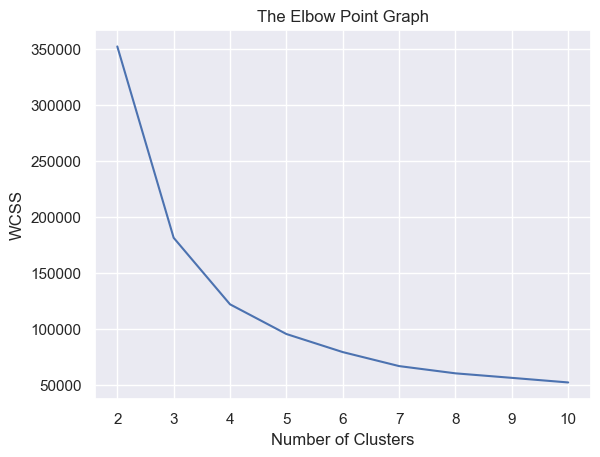

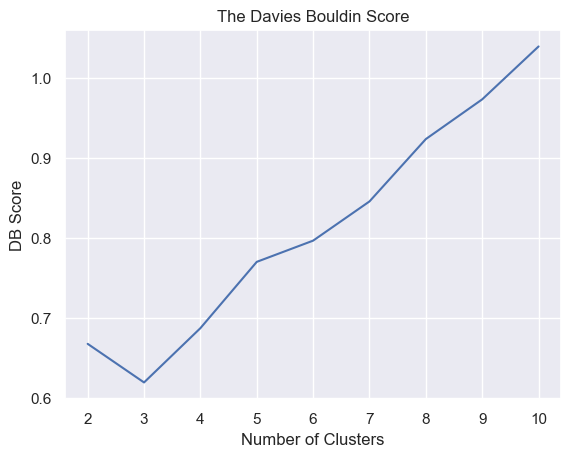

In [10]:
# plot an elbow graph

sns.set()
plt.plot(range(2,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# plt.plot(range(2,11), iter)
# plt.title('The # iteration')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Iterations')
# plt.show()

plt.plot(range(2,11), db_score)
plt.title('The Davies Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Score')
plt.show()



Optimum clusters = 4
Training k-means Clustering model       

In [11]:
kmeans = KMeans(n_clusters = 6, n_init="auto", init = 'k-means++',random_state=41)

#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 0 2 0 5 2 0 2 3 0 5 0 2 0 0 0 2 4 2 2 5 4 4 0 4 0 4 4 0 0 2 0 4 2 0 0 0
 0 3 3 0 0 3 0 3 4 2 2 0 2 4 4 3 0 3 3 5 5 2 0 2 0 4 2 5 5 0 5 4 5 0 4 2 4
 3 5 5 5 5 4 4 0 5 4 4 5 4 4 2 3 2 2 2 3 5 5 5 4 4 4 4 5 4 0 2 0 4 4 0 0 2
 3 0 5 4 4 4 0 5 3 3 0 0 5 4 5 0 4 1 4 3 3 3 4 4 3 0 0 3 3 3 0 4 2 0 5 2 5
 5 3 5 4 5 3 4 2 5 4 5 0 5 4 3 2 4 5 0 5 0 4 4 5 5 0 4 5 0 4 4 4 4 4 4 4 4
 4 0 4 4 0 4 0 4 5 4 2 0 3 5 1 4 2 1 3 4 2 2 5 2 4 5 2 4 5 5 4 4 0 2 0 3 5
 1 1 0 0 0 4 4 0 4 4 0 3 1 0 0 5 4 0 0 2 0 5 4 0 0 0 4 4 0 2 4 2 5 1 3 3 0
 4 0 5 0 0 3 0 0 3 0 4 1 0 3 4 3 5 5 4 4 0 2 2 1 3 4 4 0 4 4 0 0 5 4 3 4 4
 4 4 5 0 5 3 1 3 5 2 3 4 5 5 5 5 5 5 5 5 5 5 4 5 5 0 4 0 5 4 4 4 4 4 2 1 5
 2 1 0 5 1 4 5 0 1 5 5 4 2 4 0 1 5 2 1 4 2 2 4 5 0 2 5 3 2 5 3 5 5 2 0 5 5
 4 5 5 4 1 4 4 5 1 3 0 5 1 3 0 4 0 3 0 4 2 5 4 4 0 5 0 3 2 5 4 5 5 2 5 2 4
 4 3 3 4 4 3 3 3 0 2 4 3 3 3 2 3 1 0 0 2 4 5 5 5 5 2 5 4 2 5 0 5 3 3 4 3 0
 0 5 5 4 5 0 0 1 1 3 4 4 3 5 4 0 5 4 5 4 4 3 2 2 0 4 1 5 5 4 2 4 5 4 4 5 0
 5 5 0 5 4 4 4 4 0 2 5 2 

Visualizing all the clusters

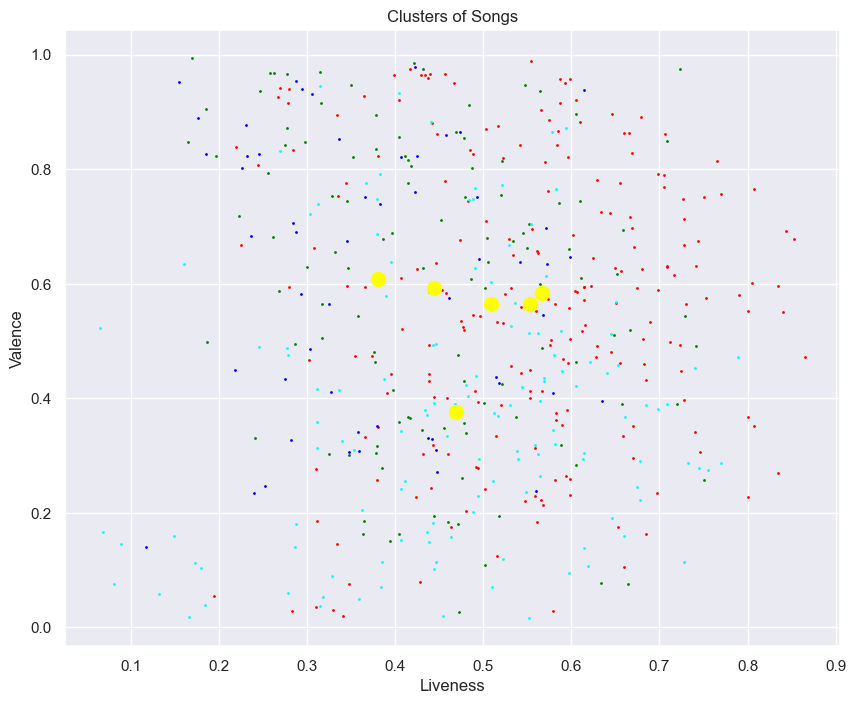

In [12]:
# plotting all the clusters and their centroids
plt.figure(figsize=(10, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 1, c = 'cyan', label = 'Cluster 4')

#plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Songs')
plt.xlabel('Liveness')
plt.ylabel('Valence')
plt.show()


Davies-Boudin Index


In [13]:
labels = kmeans.labels_
print(labels)
davies_bouldin_score(X, labels)

[4 0 2 0 5 2 0 2 3 0 5 0 2 0 0 0 2 4 2 2 5 4 4 0 4 0 4 4 0 0 2 0 4 2 0 0 0
 0 3 3 0 0 3 0 3 4 2 2 0 2 4 4 3 0 3 3 5 5 2 0 2 0 4 2 5 5 0 5 4 5 0 4 2 4
 3 5 5 5 5 4 4 0 5 4 4 5 4 4 2 3 2 2 2 3 5 5 5 4 4 4 4 5 4 0 2 0 4 4 0 0 2
 3 0 5 4 4 4 0 5 3 3 0 0 5 4 5 0 4 1 4 3 3 3 4 4 3 0 0 3 3 3 0 4 2 0 5 2 5
 5 3 5 4 5 3 4 2 5 4 5 0 5 4 3 2 4 5 0 5 0 4 4 5 5 0 4 5 0 4 4 4 4 4 4 4 4
 4 0 4 4 0 4 0 4 5 4 2 0 3 5 1 4 2 1 3 4 2 2 5 2 4 5 2 4 5 5 4 4 0 2 0 3 5
 1 1 0 0 0 4 4 0 4 4 0 3 1 0 0 5 4 0 0 2 0 5 4 0 0 0 4 4 0 2 4 2 5 1 3 3 0
 4 0 5 0 0 3 0 0 3 0 4 1 0 3 4 3 5 5 4 4 0 2 2 1 3 4 4 0 4 4 0 0 5 4 3 4 4
 4 4 5 0 5 3 1 3 5 2 3 4 5 5 5 5 5 5 5 5 5 5 4 5 5 0 4 0 5 4 4 4 4 4 2 1 5
 2 1 0 5 1 4 5 0 1 5 5 4 2 4 0 1 5 2 1 4 2 2 4 5 0 2 5 3 2 5 3 5 5 2 0 5 5
 4 5 5 4 1 4 4 5 1 3 0 5 1 3 0 4 0 3 0 4 2 5 4 4 0 5 0 3 2 5 4 5 5 2 5 2 4
 4 3 3 4 4 3 3 3 0 2 4 3 3 3 2 3 1 0 0 2 4 5 5 5 5 2 5 4 2 5 0 5 3 3 4 3 0
 0 5 5 4 5 0 0 1 1 3 4 4 3 5 4 0 5 4 5 4 4 3 2 2 0 4 1 5 5 4 2 4 5 4 4 5 0
 5 5 0 5 4 4 4 4 0 2 5 2 

0.7964123649779834

Sillhouette

In [14]:
silhouette_score(X, labels)


0.37642091872275746